In [2]:
from warnings import simplefilter

import numpy as np
import seaborn as sns
from matplotlib.ticker import MaxNLocator

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import (
    CutoffSplitter,
    ExpandingWindowSplitter,
    SingleWindowSplitter,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.utils.plotting import plot_series

from plot_windows import plot_windows
from plot_windows import get_windows

# data

In [3]:
y = load_airline().iloc[:30]
print(y.head())
print(y.shape)
print(y.name)

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64
(30,)
Number of airline passengers


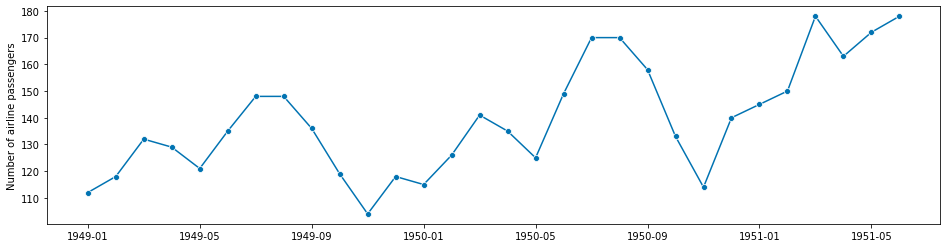

In [4]:
fig, ax = plot_series(y)

# single train-test split

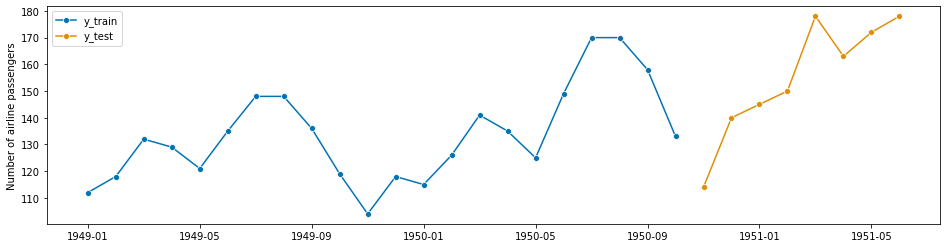

In [5]:
y_train, y_test = temporal_train_test_split(y = y, test_size = 0.25)
fig, ax = plot_series(y_train, y_test, labels = ["y_train", "y_test"])

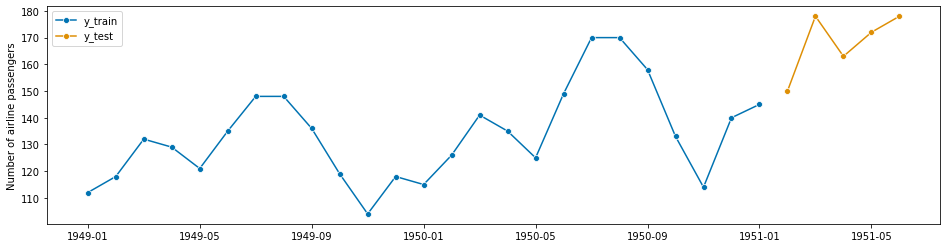

In [6]:
fh = ForecastingHorizon([1, 2, 3, 4, 5])
y_train, y_test = temporal_train_test_split(y, fh = fh)
fig, ax = plot_series(y_train, y_test, labels  = ["y_train", "y_test"])

# Single split

Number of Folds: 1
train windows:
 [array([22, 23, 24, 25, 26])] 
train data:
 1950-11    114.0
1950-12    140.0
1951-01    145.0
1951-02    150.0
1951-03    178.0
Freq: M, Name: Number of airline passengers, dtype: float64
test windows:
 [array([27, 28, 29])] 
test data:
 1951-04    163.0
1951-05    172.0
1951-06    178.0
Freq: M, Name: Number of airline passengers, dtype: float64


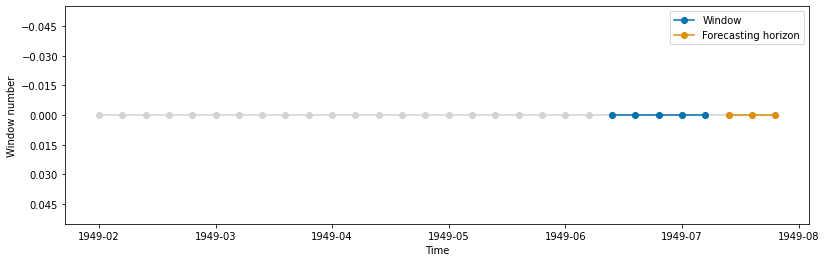

In [7]:
# splitter parameters
window_length = 5
fh = ForecastingHorizon([1, 2, 3])
# split
cv = SingleWindowSplitter(window_length = window_length, fh = fh)
n_splits = cv.get_n_splits(y)
print(f"Number of Folds: {n_splits}")

# split windows and split datasets
train_windows, test_windows = get_windows(y, cv)
print(f"train windows:\n {train_windows} \ntrain data:\n {y.iloc[train_windows[0]]}")
print(f"test windows:\n {test_windows} \ntest data:\n {y.iloc[test_windows[0]]}")

# plotting windows
plot_windows(y, train_windows, test_windows)

# Sliding split

## without initial window

Number of Folds: 23
train windows:
 [array([0, 1, 2, 3, 4]), array([1, 2, 3, 4, 5]), array([2, 3, 4, 5, 6]), array([3, 4, 5, 6, 7]), array([4, 5, 6, 7, 8]), array([5, 6, 7, 8, 9]), array([ 6,  7,  8,  9, 10]), array([ 7,  8,  9, 10, 11]), array([ 8,  9, 10, 11, 12]), array([ 9, 10, 11, 12, 13]), array([10, 11, 12, 13, 14]), array([11, 12, 13, 14, 15]), array([12, 13, 14, 15, 16]), array([13, 14, 15, 16, 17]), array([14, 15, 16, 17, 18]), array([15, 16, 17, 18, 19]), array([16, 17, 18, 19, 20]), array([17, 18, 19, 20, 21]), array([18, 19, 20, 21, 22]), array([19, 20, 21, 22, 23]), array([20, 21, 22, 23, 24]), array([21, 22, 23, 24, 25]), array([22, 23, 24, 25, 26])]
test windows:
 [array([5, 6, 7]), array([6, 7, 8]), array([7, 8, 9]), array([ 8,  9, 10]), array([ 9, 10, 11]), array([10, 11, 12]), array([11, 12, 13]), array([12, 13, 14]), array([13, 14, 15]), array([14, 15, 16]), array([15, 16, 17]), array([16, 17, 18]), array([17, 18, 19]), array([18, 19, 20]), array([19, 20, 21]), arra

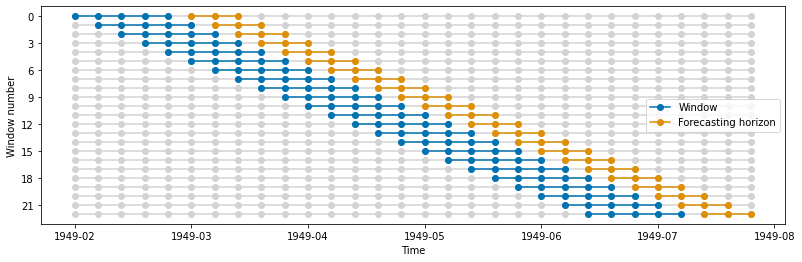

In [8]:
# splitter parameters
window_length = 5
fh = ForecastingHorizon([1, 2, 3])

# split
cv = SlidingWindowSplitter(window_length = window_length, fh = fh)
n_splits = cv.get_n_splits(y)
print(f"Number of Folds: {n_splits}")

# split windows and split datasets
train_windows, test_windows = get_windows(y, cv)
print(f"train windows:\n {train_windows}")
print(f"test windows:\n {test_windows}")

# plotting windows
plot_windows(y, train_windows, test_windows)

## with initial window

Number of Folds: 18
train windows:
 [array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 6,  7,  8,  9, 10]), array([ 7,  8,  9, 10, 11]), array([ 8,  9, 10, 11, 12]), array([ 9, 10, 11, 12, 13]), array([10, 11, 12, 13, 14]), array([11, 12, 13, 14, 15]), array([12, 13, 14, 15, 16]), array([13, 14, 15, 16, 17]), array([14, 15, 16, 17, 18]), array([15, 16, 17, 18, 19]), array([16, 17, 18, 19, 20]), array([17, 18, 19, 20, 21]), array([18, 19, 20, 21, 22]), array([19, 20, 21, 22, 23]), array([20, 21, 22, 23, 24]), array([21, 22, 23, 24, 25]), array([22, 23, 24, 25, 26])]
test windows:
 [array([10, 11, 12]), array([11, 12, 13]), array([12, 13, 14]), array([13, 14, 15]), array([14, 15, 16]), array([15, 16, 17]), array([16, 17, 18]), array([17, 18, 19]), array([18, 19, 20]), array([19, 20, 21]), array([20, 21, 22]), array([21, 22, 23]), array([22, 23, 24]), array([23, 24, 25]), array([24, 25, 26]), array([25, 26, 27]), array([26, 27, 28]), array([27, 28, 29])]


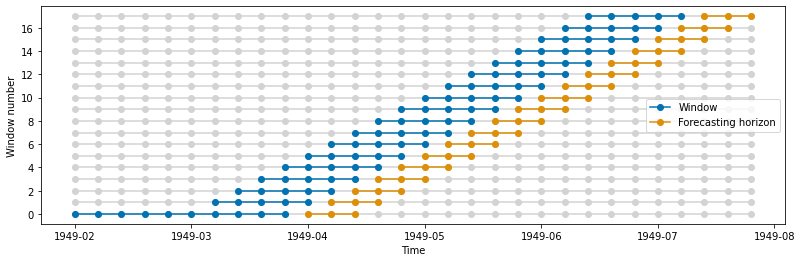

In [11]:
# splitter parameters
window_length = 5
fh = ForecastingHorizon([1, 2, 3])
initial_window = 10

# split
cv = SlidingWindowSplitter(window_length = window_length, fh = fh, initial_window = initial_window)
n_splits = cv.get_n_splits(y)
print(f"Number of Folds: {n_splits}")

# split windows and split datasets
train_windows, test_windows = get_windows(y, cv)
print(f"train windows:\n {train_windows}")
print(f"test windows:\n {test_windows}")

# plotting windows
plot_windows(y, train_windows, test_windows)

# Expanding split

Number of Folds: 23
train windows:
 [array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5, 6]), array([0, 1, 2, 3, 4, 5, 6, 7]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 

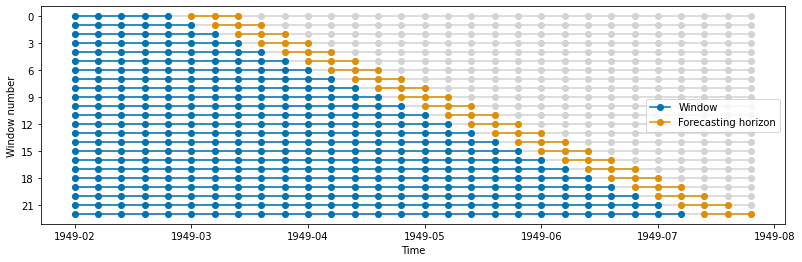

In [13]:
# splitter parameters
initial_window = 5
fh = ForecastingHorizon([1, 2, 3])

# split
cv = ExpandingWindowSplitter(initial_window = initial_window, fh = fh)
n_splits = cv.get_n_splits(y)
print(f"Number of Folds: {n_splits}")

# split windows and split datasets
train_windows, test_windows = get_windows(y, cv)
print(f"train windows:\n {train_windows}")
print(f"test windows:\n {test_windows}")

# plotting windows
plot_windows(y, train_windows, test_windows)

# Multiple split

Number of Folds = 4
train windows:
 [array([ 6,  7,  8,  9, 10]), array([ 9, 10, 11, 12, 13]), array([11, 12, 13, 14, 15]), array([21, 22, 23, 24, 25])]
test windows:
 [array([11, 12, 13]), array([14, 15, 16]), array([16, 17, 18]), array([26, 27, 28])]


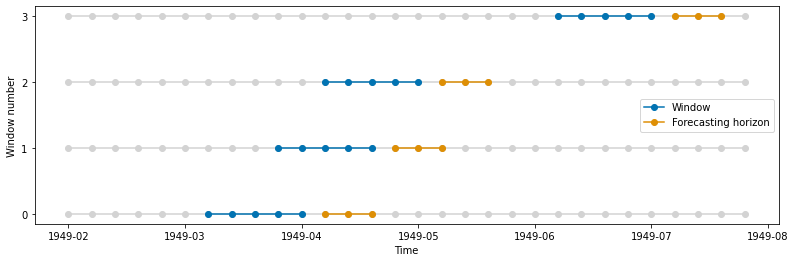

In [15]:
# splitter parameters
window_length = 5
fh = ForecastingHorizon([1, 2, 3])
cutoffs = np.array([10, 13, 15, 25])  # Specify cutoff points (by array index).

cv = CutoffSplitter(cutoffs = cutoffs, window_length = window_length, fh = fh)

n_splits = cv.get_n_splits(y)
print(f"Number of Folds = {n_splits}")

# split windows and split datasets
train_windows, test_windows = get_windows(y, cv)
print(f"train windows:\n {train_windows}")
print(f"test windows:\n {test_windows}")

# plotting windows
plot_windows(y, train_windows, test_windows)